# Normalfordeling

La $X$ være en stokastisk variabel slik at $X \sim N(\mu, \sigma)$. Vi sier at $X$ er normalfordelt med parametere $\mu$ og $\sigma$, der $\mu$ er forventningsverdien $\text{E}(X)$ og $\sigma$ er standardavviket $\text{SD}(X) = \sqrt{\text{Var}(X)}$. Den stokastiske variabelen $X$ er kontinuerlig. 

I praksis er det mange størrelser som kan anses å være normalfordelte, f.eks målinger av en bestemt størrelse der målingene er forbundet med usikkerhet, og størrelser som forekommer i naturen slik som høyden til en tilfeldig valgt person.

I denne notatboken illustres hvordan du kan regne ut sannsynligheter for $X$, og plotte sannsynlighetsfordelingen til $X$, ved bruk av python-kode.

In [1]:
from scipy import stats # statistikk-modulen i scipy-pakken
import matplotlib.pyplot as plt # plotting
import numpy as np

## Sannsynlighetstetthet $f(x)$

Husk at vi ikke kan regne på punktsannsynligheter $P(X= x)$ for kontinuerlige stokastiske variabler. I stedet representerer vi sannsynlighetsfordelingen til $X$ med en sannsynlighetstetthet $f(x)$. For normalfordelingen har funksjonen $f(x)$ den velkjente klokkeformen ("bell curve"). Kurven er symmetrisk, sentrert rundt $x = \mu$, der den også har et toppunkt, og bredden på kurven avgjøres av parameteren $\sigma$. Dersom $\mu = 0$ og $\sigma = 1$ så bruker vi uttrykket *standard normalfordeling*.

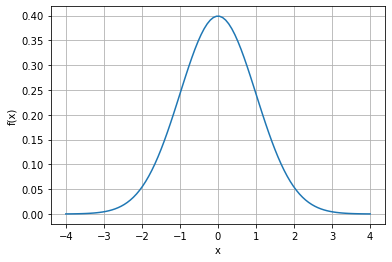

In [2]:
mu = 0     # forventningsverdien til X
sigma = 1  # standardavviket til X

xval = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)  # x-verdier
fx = stats.norm.pdf(xval, mu, sigma)                 # f(x)
plt.plot(xval, fx)
plt.grid(); plt.ylabel("f(x)"); plt.xlabel("x")
plt.show()

## Kumulative sannsynligheter

Å regne ut sannsynligheter slik som $P(X \leq x)$ og $P(a < X \leq b)$ går ut på å regne ut arealet under kurven $f(x)$. Dette krever å regne ut et integral som vi ikke klarer å løse "for hånd", og derfor bruker vi statistisk programvare (eller tabeller) som kan regne ut kumulative sannsynligheter $F(x) = P(X \leq x)$ for oss. 

In [3]:
mu = 4
sigma = 2
x = 3
stats.norm.cdf(x,mu,sigma)  # P(X ≤ x)

0.3085375387259869

Text(0.5, 0, 'x')

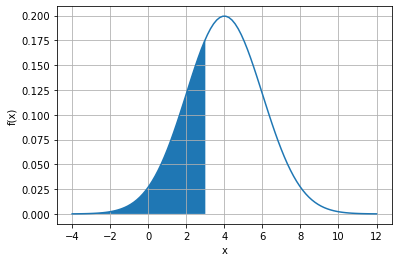

In [4]:
xval = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)  # x-verdier
fx = stats.norm.pdf(xval, mu, sigma)                 # f(x)

section = np.linspace(mu - 4*sigma,x, 100)           # alle x-verdier opp til valgte x

plt.plot(xval, fx)
plt.fill_between(section,stats.norm.pdf(section, mu, sigma))
plt.grid(); plt.ylabel("f(x)"); plt.xlabel("x")

# arealet av det fargede området er P(X≤x)

In [5]:
mu = 4
sigma = 2
a = 3
b = 6
stats.norm.cdf(b,mu, sigma) - stats.norm.cdf(a,mu, sigma)  # P(a < X ≤ b)

0.532807207342556

Text(0.5, 0, 'x')

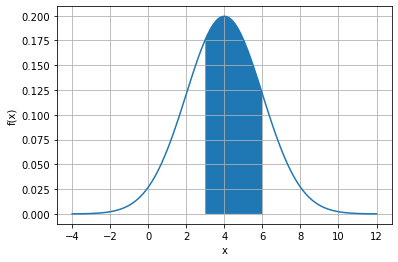

In [6]:
xval = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)  # x-verdier
fx = stats.norm.pdf(xval, mu, sigma)                 # f(x)

section = np.linspace(a,b, 100)           # alle x-verdier opp til valgte x

plt.plot(xval, fx)
plt.fill_between(section,stats.norm.pdf(section, mu, sigma))
plt.grid(); plt.ylabel("f(x)"); plt.xlabel("x")

# arealet av det fargede området er P(a < X ≤ b)

## Kritiske verdier i normalfordelingen

En kritisk verdi er et punkt $x_{\alpha}$ på tallinja slik at $P(X > x) = \alpha$ for en gitt sannsynlighet $\alpha$. Dersom $X \sim N(\mu, \sigma)$, hvilket tall på tallinja, $x_{0.1}$ oppfyller $P(X > x_{0.1}) = 0.1$?

In [7]:
mu = 4
sigma = 2
alpha = 0.1
stats.norm.ppf(1-alpha,mu,sigma) # OBS: 1-alpha fordi pythons ppf-funksjon regner på venstre hale

6.563103131089201

Text(0.5, 0, 'x')

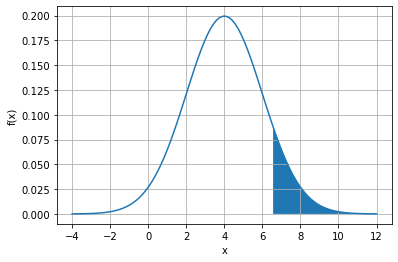

In [8]:
# Plotter kritisk verdi og areal i høyre hale 
xval = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)  # x-verdier
fx = stats.norm.pdf(xval, mu, sigma)                 # f(x)
x_alpha = stats.norm.ppf(1 - alpha,mu,sigma)

section = np.linspace(x_alpha,mu + 4*sigma, 100, 100) # alle x-verdier fra x_alpha og oppover

plt.plot(xval, fx)
plt.fill_between(section,stats.norm.pdf(section, mu, sigma))
plt.grid(); plt.ylabel("f(x)"); plt.xlabel("x")

## Standard normalfordeling

Husk at alle sannsynligheter i normalfordeling kan regnes ut ved å gjøre om problemet til et problem i standard normalfordeling. La oss sjekke at det stemmer:

In [9]:
mu = 4
sigma = 2
x = 3
stats.norm.cdf(x,mu,sigma)  # P(X ≤ x)

0.3085375387259869

In [10]:
stats.norm.cdf((x-mu)/sigma,0,1)  # P(X ≤ x)

0.3085375387259869

In [11]:
mu = 4
sigma = 2
a = 3
b = 6
stats.norm.cdf(b,mu, sigma) - stats.norm.cdf(a,mu, sigma)  # P(a < X ≤ b)

0.532807207342556

In [12]:
stats.norm.cdf((b-mu)/sigma,0,1) - stats.norm.cdf((a-mu)/sigma,0,1)  # P(a < X ≤ b)

0.532807207342556